In [49]:
# all of your imports go here
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import math

# Preliminary notes

This is a formal evaluation. It accounts for 30% of your final score in the practical component of the Data Science module. Please observe the following rules during the entire evaluation:

1. You cannot speak to other students once that evaluation starts.
2. There will be 15 minutes at the beginning where you can ask questions, and 5 min in the middle, and another 5 min towards the end of the test. Wait for your professor to indicate when you can ask questions.
3. You can only consult the Python documentation site.
4. You cannot consult any previous notebooks you created or shared with you.
5. All the math formulae you need are included here.
6. You can only have your Jupyter Python and a broswer pointing to the Python documentation open. Any other open tabs or apps can invalidate your test.
7. Distributing the contents of this test is forbidden.


# Questions

Your goal in this evaluation is to explore a dataset on people being exposed to advertising of video games that have weapons and fighting in them. There are just five columns:

1. `exposure_mins`: how many minutes a person was exposed to the adverts
2. `gender`: the person's gender
3. `buying_close_score`: a score between 0-100 that indicates how close a person was to buying the game (100 means they bought it)
4. `class`: 1 for student, 2 for higher education, and 3 for unemployed.
5. `age`: the person's age

You are required to answer the following questions:

Q1. Produce scatter plot for a. Males, b. Females where you can see analytically whether there may be a relationship betwen exposure_mins and buying_close_score

Q2. Were male and female exposed to the adverts similarly in terms of exposure minutes, use box plots and answer analitically.

Q3. Perform a linear regression using the variables from the dataframe to address the following question:

- What are the independent and dependent variables do you suggest?
- Describe the relationship you will study, for example, females watch more adverts
- Obtain coeficients of independent variables using a naive approach or the Python libraries you explored in the lab sessions
- Obtain the Confidence Intervals for the two coefficients.

Q4. Produce a box plot array with two box plots that show the buying_close_score for a. male who spent 5 min or less watching adverts and b. those who spent more than 5 min. Interpret your results analytically

Q5. Repeat Q4 but for female.

Q6. Is there any relationship between the variable class and buying_close_score? How do you justify your answer?


In [50]:
# Import csv
data = pd.read_csv('dataset2.csv')
data.head()

,exposure_mins,gender,buying_close_score,class,age
0,6,F,3.462180,1,32
1,3,F,1.347062,2,30
2,7,M,-24.330303,1,37
3,4,F,1.093821,2,32
4,6,M,-20.568937,1,39


In [51]:
data['exposure_mins'].unique()

array([6, 3, 7, 4, 9, 2, 5, 1, 0, 8])

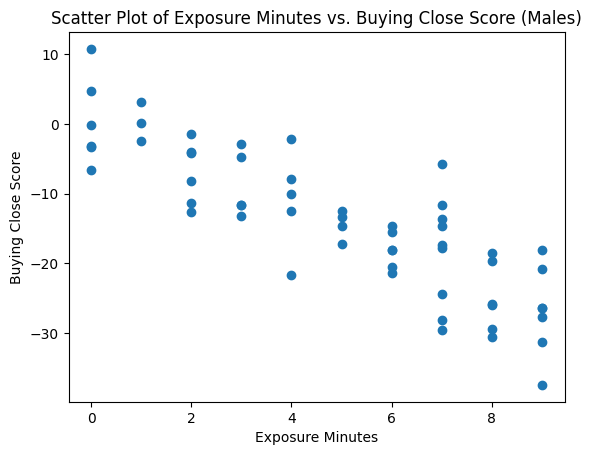

In [52]:
"""
Q1 | A) Scatter plot for males where you can see analytically whether there
may be a relationship betwen exposure_mins and buying_close_score
"""
# Filter data with males
males = data[data['gender'] == 'M']

plt.scatter(males['exposure_mins'], males['buying_close_score'])

plt.xlabel('Exposure Minutes')
plt.ylabel('Buying Close Score')
plt.title('Scatter Plot of Exposure Minutes vs. Buying Close Score (Males)')

# plt.grid(True)
plt.show()

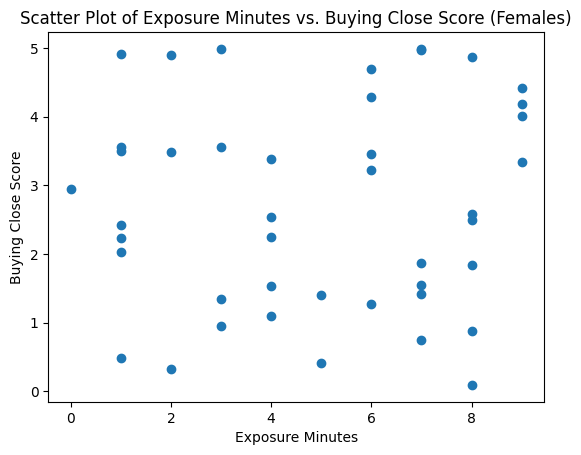

In [53]:
"""
Q1 | B) Scatter plot for females where you can see analytically whether there
may be a relationship betwen exposure_mins and buying_close_score
"""
# Filter data with females
females = data[data['gender'] == 'F']

plt.scatter(females['exposure_mins'], females['buying_close_score'])

plt.xlabel('Exposure Minutes')
plt.ylabel('Buying Close Score')
plt.title('Scatter Plot of Exposure Minutes vs. Buying Close Score (Females)')

plt.show()

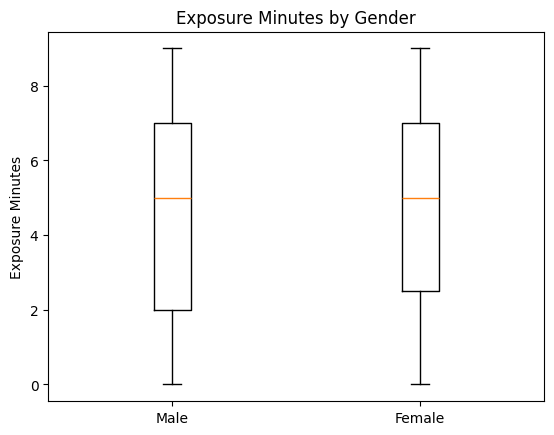

In [54]:
"""
Q2. Were male and female exposed to the adverts similarly in terms of exposure
minutes, use box plots and answer analitically.
"""
plt.boxplot([data[data['gender'] == 'M']['exposure_mins'],
             data[data['gender'] == 'F']['exposure_mins']],
            labels=['Male', 'Female'])

plt.title('Exposure Minutes by Gender')
plt.ylabel('Exposure Minutes')

plt.show()

In [55]:
"""
The difference between the both genders are not statistically speaking super separated.
You an appreciate a smaller Q1 on the Female BoxPlot, that signifies that
they've had on average more exposure minutes than males, but the median in both is
around 5 minutes.
"""

"\nThe difference between the both genders are not statistically speaking super separated.\nYou an appreciate a smaller Q1 on the Female BoxPlot, that signifies that\nthey've had on average more exposure minutes than males, but the median in both is\naround 5 minutes.\n"

In [57]:
# Label encoding
data['gender'] = data['gender'].astype(str)

filter1 = data['gender'] == 'F'
filter2 = data['gender'] == 'M'

data.loc[filter1, 'gender'] = 0
data.loc[filter2, 'gender'] = 1

data.head()

,exposure_mins,gender,buying_close_score,class,age
0,6,0,3.462180,1,32
1,3,0,1.347062,2,30
2,7,1,-24.330303,1,37
3,4,0,1.093821,2,32
4,6,1,-20.568937,1,39


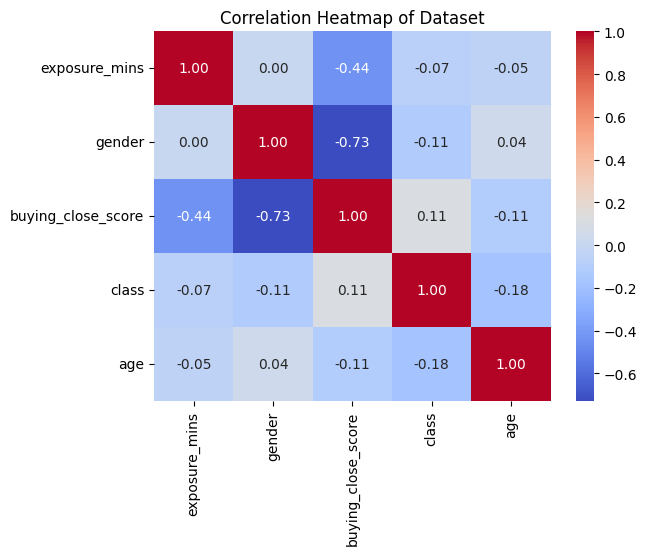

In [58]:
"""
Q3. Perform a linear regression using the variables from the dataframe to address the following question:
Describe the relationship you will study, for example, females watch more adverts
Obtain coeficients of independent variables using a naive approach or the Python libraries you explored in the lab sessions
Obtain the Confidence Intervals for the two coefficients.
"""
import seaborn as sns

sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Dataset')

plt.show()

In [60]:
# What are the independent and dependent variables do you suggest?
# Independent variable (X): exposure_mins, gender
# Dependent variable (y): buying_close_score
"""
Relationship to study:  How exposure to video game advertisements (exposure_mins),
& gender affect the likelihood of purchasing the game (buying_close_score).
"""
# Define the model formula
formula = 'buying_close_score ~ exposure_mins + gender'

# Fit the model
model = smf.ols(formula, data=data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     buying_close_score   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     129.5
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           4.07e-28
Time:                        11:46:05   Log-Likelihood:                -320.29
No. Observations:                 100   AIC:                             646.6
Df Residuals:                      97   BIC:                             654.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.3652      1.388      8.186

In [ ]:
# Access coefficients and confidence intervals
coefficients = model.params
confidence_intervals = model.conf_int()

print(coefficients)

confidence_intervals

In [ ]:
"""
Q4. Produce a box plot array with two box plots that show the buying_close_score
for a. male who spent 5 min or less watching adverts and b. those who spent more
than 5 min. Interpret your results analytically
"""

In [ ]:
# Q4 | A
# Filter data for males
males = data[data['gender'] == 1]

# Create box plots for males based on exposure_mins
sns.boxplot(x=(males['exposure_mins'] <= 5), y=males['buying_close_score'])
plt.xlabel('Exposure Minutes (<= 5 min)')
plt.ylabel('Buying Close Score')
plt.title('Buying Close Score for Males (Exposure <= 5 vs > 5 min)')
plt.show()

In [ ]:
# Q5. Repeat Q4 but for female.
# Filter data for females
females = data[data['gender'] == 0]

# Create box plots for females based on exposure_mins
sns.boxplot(x=(females['exposure_mins'] <= 5), y=females['buying_close_score'])
plt.xlabel('Exposure Minutes (<= 5 min)')
plt.ylabel('Buying Close Score')
plt.title('Buying Close Score for Females (Exposure <= 5 vs > 5 min)')

plt.show()

In [ ]:
# Interpret your results analytically
"""
In the men case, if they were less exposed they tend to buy it more, but if they saw
a lot of advertisment for it they'll buy it less
On the contrary, if females are less exposed to the advertisment, they'll buy it less than
if they actually see what's inside with the adverts.

There's a clear difference between female and male, where males will avoid buying the
game of there's violence, wether females are more drawn to it.
"""

In [ ]:
# Q6 Is there any relationship between the variable class and buying_close_score?
# How do you justify your answer?
"""
Looking over at my results, it can be said that the 0.11 correlation that appears
between those two variables is a slight positive one, but not overally significant
to try and risk to deviate the original model
"""

### Perguntas

O objetivo desta avaliação é explorar um conjunto de dados sobre pessoas expostas a publicidade de videojogos que incluem armas e luta. O conjunto de dados possui apenas cinco colunas:

- **exposure_mins**: o número de minutos que uma pessoa esteve exposta aos anúncios.  
- **gender**: o género da pessoa.  
- **buying_close_score**: uma pontuação entre 0 e 100 que indica quão próxima a pessoa esteve de comprar o jogo (100 significa que comprou).  
- **class**: 1 para estudante, 2 para ensino superior, e 3 para desempregado.  
- **age**: a idade da pessoa.  

É necessário responder às seguintes questões:

**Q1.** Produza um gráfico de dispersão para:
  - a) Homens  
  - b) Mulheres  
  Onde se possa analisar se existe uma relação entre **exposure_mins** e **buying_close_score**.

**Q2.** Homens e mulheres foram expostos aos anúncios de forma semelhante em termos de minutos de exposição? Utilize gráficos de caixa (boxplots) e analise os resultados.

**Q3.** Realize uma regressão linear utilizando as variáveis do conjunto de dados para responder à seguinte questão:  
  - Quais são as variáveis independentes e dependentes que sugere?  
  - Descreva a relação que irá estudar, por exemplo: *as mulheres assistem mais anúncios*.  
  - Obtenha os coeficientes das variáveis independentes usando uma abordagem ingênua ou bibliotecas Python exploradas nas sessões de laboratório.  
  - Obtenha os intervalos de confiança para os dois coeficientes.

**Q4.** Produza um array de gráficos de caixa (boxplots) com dois gráficos que mostrem o **buying_close_score** para:
  - a) Homens que passaram 5 minutos ou menos a assistir aos anúncios.  
  - b) Homens que passaram mais de 5 minutos.  
  Interprete os resultados analiticamente.

**Q5.** Repita a questão anterior, mas para mulheres.

**Q6.** Existe alguma relação entre a variável **class** e **buying_close_score**? Como justifica a sua resposta?

In [ ]:
# Your code for all the questions must be here

# Question 1


# Question 2


# Question 3


# Question 4


# Question 5

